### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Data Understanding and Data preperation

In [3]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup_data.shape

(50, 5)

In [5]:
startup_data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

### Replacing 0.00 with mean

In [6]:
startup_data['R&D Spend'].mean()

73721.61559999999

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

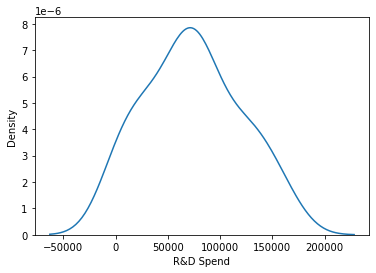

In [7]:
sns.distplot(startup_data['R&D Spend'],hist= False)

In [8]:
startup_data['R&D Spend'] = startup_data['R&D Spend'].replace(0.00,round(startup_data['R&D Spend'].mean(),2))
startup_data['R&D Spend']

0     165349.20
1     162597.70
2     153441.51
3     144372.41
4     142107.34
5     131876.90
6     134615.46
7     130298.13
8     120542.52
9     123334.88
10    101913.08
11    100671.96
12     93863.75
13     91992.39
14    119943.24
15    114523.61
16     78013.11
17     94657.16
18     91749.16
19     86419.70
20     76253.86
21     78389.47
22     73994.56
23     67532.53
24     77044.01
25     64664.71
26     75328.87
27     72107.60
28     66051.52
29     65605.48
30     61994.48
31     61136.38
32     63408.86
33     55493.95
34     46426.07
35     46014.02
36     28663.76
37     44069.95
38     20229.59
39     38558.51
40     28754.33
41     27892.92
42     23640.93
43     15505.73
44     22177.74
45      1000.23
46      1315.46
47     73721.62
48       542.05
49     73721.62
Name: R&D Spend, dtype: float64

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

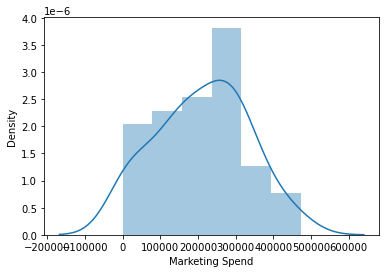

In [9]:
sns.distplot(startup_data['Marketing Spend'])

In [10]:
startup_data['Marketing Spend'] = startup_data['Marketing Spend'].replace(0.00,round(startup_data['Marketing Spend'].mean(),2))
startup_data['Marketing Spend']

0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19    211025.10
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47    211025.10
48    211025.10
49     45173.06
Name: Marketing Spend, dtype: float64

In [11]:
startup_data.drop(labels='State', axis=1,inplace=True)

In [12]:
startup_data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Assumption Check 

### 1. Linearity

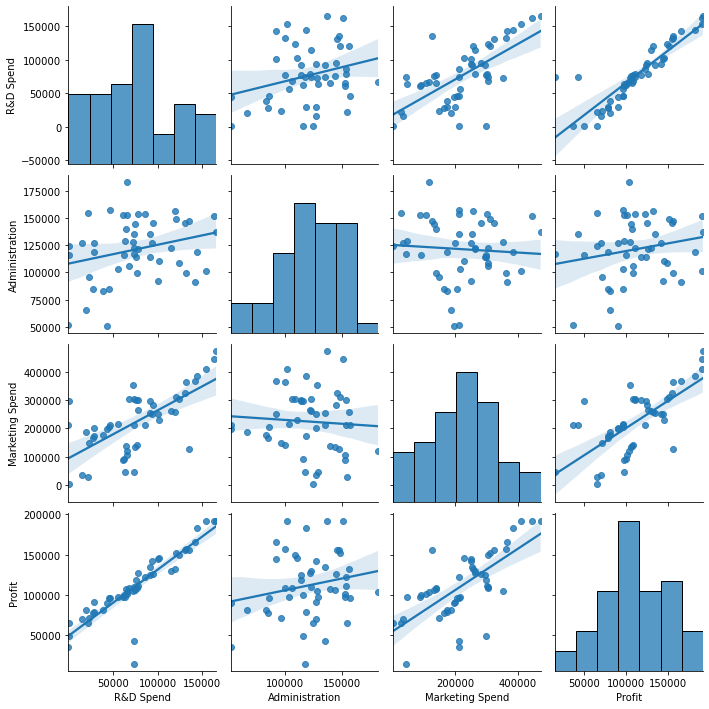

In [13]:
sns.pairplot(startup_data, kind= 'reg')
plt.show()

#### OBSERVATION
ONLY R&D SPEND FOLLOWING LINEARITY

### 2. Normality check

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

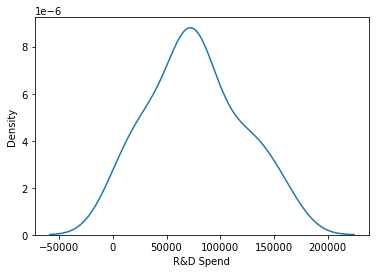

In [14]:
sns.distplot(startup_data['R&D Spend'], hist= False)

<AxesSubplot:xlabel='Administration', ylabel='Density'>

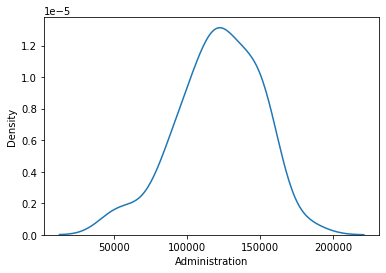

In [15]:
sns.distplot(startup_data['Administration'], hist= False)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

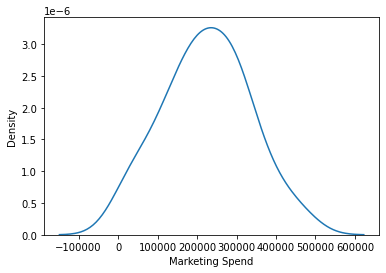

In [16]:
sns.distplot(startup_data['Marketing Spend'], hist= False)

#### OBSERVATION
Normality **passed**

### 3. MultiCollinearity Check


<AxesSubplot:>

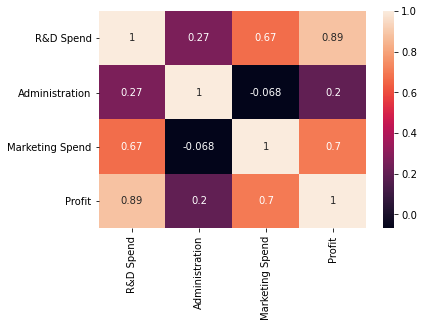

In [17]:
sns.heatmap(startup_data.corr(),annot = True)

#### OBSERVATION
MultiCollinearity **failed**

### 4. No Autoregression
Autoregression **passed**

### 5. Homoscadascity Check | 6. Zero Residual Mean Check
Note: These 2 tests can be performed post model training

## Model Building

In [18]:
startup_data=startup_data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

In [19]:
X = startup_data[['RDS' , 'ADMS' , 'MKTS']]
X.head()

,RDS,ADMS,MKTS
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [20]:
y = startup_data[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
X.mean()

RDS      76670.4804
ADMS    121344.6396
MKTS    223686.6038
dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_X = std_scalar.fit_transform(X)
scaled_X

array([[ 2.06801568,  0.56075291,  2.28164087],
       [ 2.00384983,  1.08280658,  2.02518985],
       [ 1.7903246 , -0.72825703,  1.69444524],
       [ 1.57883033, -0.09636463,  1.46696933],
       [ 1.52600818, -1.07991935,  1.31034106],
       [ 1.2874311 , -0.77623907,  1.27992752],
       [ 1.35129518,  0.93214721, -0.88259086],
       [ 1.25061368,  0.87198001,  0.92140298],
       [ 1.02310978,  0.9869521 ,  0.80862211],
       [ 1.0882285 , -0.45664025,  0.74763363],
       [ 0.58866537, -0.38759909,  0.0503451 ],
       [ 0.55972207, -1.0655396 ,  0.23964319],
       [ 0.40095246,  0.21544906,  0.24051585],
       [ 0.35731176,  0.51017895,  0.26650061],
       [ 1.00913439,  1.26919939,  0.30188884],
       [ 0.88274691,  0.04586785,  0.35029313],
       [ 0.03131055,  0.00911842,  0.3739267 ],
       [ 0.41945503,  0.85566632,  0.5415637 ],
       [ 0.35163956, -0.25846537,  0.65509749],
       [ 0.22735487,  1.15983657, -0.11644214],
       [-0.00971572, -0.26958765,  0.689

In [23]:
scaled_X = pd.DataFrame(data = scaled_X, columns=['RDS' , 'ADMS' , 'MKTS'])

In [24]:
scaled_X.head()

,RDS,ADMS,MKTS
0,2.068016,0.560753,2.281641
1,2.003850,1.082807,2.025190
2,1.790325,-0.728257,1.694445
3,1.578830,-0.096365,1.466969
4,1.526008,-1.079919,1.310341


In [25]:
scaled_X.mean()

RDS     9.880985e-17
ADMS   -2.919887e-16
MKTS   -3.153033e-16
dtype: float64

In [26]:
scaled_X.std()

RDS     1.010153
ADMS    1.010153
MKTS    1.010153
dtype: float64

In [27]:
import statsmodels.formula.api as smf

In [28]:
startup_data.columns

Index(['RDS', 'ADMS', 'MKTS', 'Profit'], dtype='object')

In [29]:
linear_model = smf.ols(formula='Profit~RDS + ADMS + MKTS',data=startup_data).fit()

In [30]:
linear_model.predict(scaled_X)

0     40108.686859
1     40108.632731
2     40108.427451
3     40108.274273
4     40108.208622
5     40108.044882
6     40107.964025
7     40108.022470
8     40107.857203
9     40107.872818
10    40107.474281
11    40107.455667
12    40107.367318
13    40107.343873
14    40107.815918
15    40107.709321
16    40107.114649
17    40107.413283
18    40107.354292
19    40107.236859
20    40107.103746
21    40107.164771
22    40107.075656
23    40106.960309
24    40107.002598
25    40106.824581
26    40106.998916
27    40107.081145
28    40106.861583
29    40106.828112
30    40106.734727
31    40106.742447
32    40106.736627
33    40106.702450
34    40106.586820
35    40106.530236
36    40106.271041
37    40106.471345
38    40106.083918
39    40106.387052
40    40106.248319
41    40106.207155
42    40106.134192
43    40105.946853
44    40106.068449
45    40105.685833
46    40105.881230
47    40107.018128
48    40105.770687
49    40106.896483
dtype: float64

In [31]:
model_1 = smf.ols('Profit ~ RDS',data = startup_data).fit()
print('R2 score          : ',round(model_1.rsquared,4))
print('Adjusted R2 score : ',round(model_1.rsquared_adj,4))
print('AIC value         : ',round(model_1.aic,4)) 
print('BIC value         : ',round(model_1.bic,4))

R2 score          :  0.7872
Adjusted R2 score :  0.7828
AIC value         :  1127.9345
BIC value         :  1131.7585


In [32]:
model_2 = smf.ols('Profit ~ RDS+ADMS',data = startup_data).fit()
print('R2 score          : ',round(model_2.rsquared,4))
print('Adjusted R2 score : ',round(model_2.rsquared_adj,4))
print('AIC value         : ',round(model_2.aic,4)) 
print('BIC value         : ',round(model_2.bic,4))

R2 score          :  0.7887
Adjusted R2 score :  0.7797
AIC value         :  1129.5777
BIC value         :  1135.3138


In [33]:
model_3 = smf.ols('Profit ~ RDS+MKTS',data = startup_data).fit()
print('R2 score          : ',round(model_3.rsquared,4))
print('Adjusted R2 score : ',round(model_3.rsquared_adj,4))
print('AIC value         : ',round(model_3.aic,4)) 
print('BIC value         : ',round(model_3.bic,4))

R2 score          :  0.8071
Adjusted R2 score :  0.7989
AIC value         :  1125.0196
BIC value         :  1130.7556


In [34]:
model_4 = smf.ols('Profit ~ RDS+MKTS+ADMS',data = startup_data).fit()
print('R2 score          : ',round(model_4.rsquared,4))
print('Adjusted R2 score : ',round(model_4.rsquared_adj,4))
print('AIC value         : ',round(model_4.aic,4)) 
print('BIC value         : ',round(model_4.bic,4))

R2 score          :  0.8073
Adjusted R2 score :  0.7947
AIC value         :  1126.9876
BIC value         :  1134.6357


### Detecting and Deleting outlier

In [35]:
model_influence = linear_model.get_influence()
(c,_) = model_influence.cooks_distance

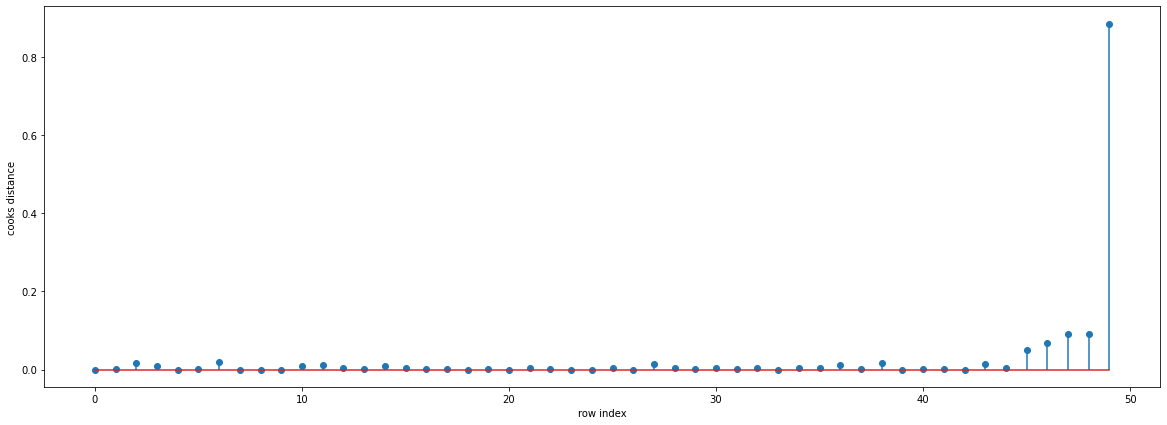

In [36]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_data)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [37]:
np.max(c),np.argmax(c)

(0.8847332579717122, 49)

In [38]:
startup_data[startup_data.index.isin([49])]

,RDS,ADMS,MKTS,Profit
49,73721.62,116983.8,45173.06,14681.4


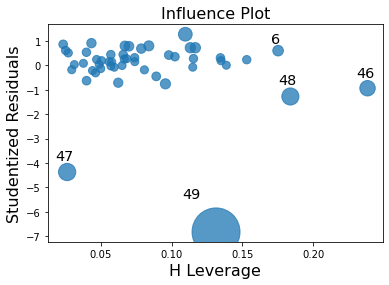

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model)
plt.show()

In [40]:
startup_data1 = startup_data.drop(startup_data.index[49],axis = 0).reset_index()

In [41]:
startup_data1

,index,RDS,ADMS,MKTS,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [42]:
startup_data1.drop(['index'],axis = 1, inplace=True)

In [43]:
linear_model1 = smf.ols(formula='Profit~RDS + ADMS + MKTS',data=startup_data1).fit()

In [44]:
model_influence = linear_model1.get_influence()
(c,_) = model_influence.cooks_distance

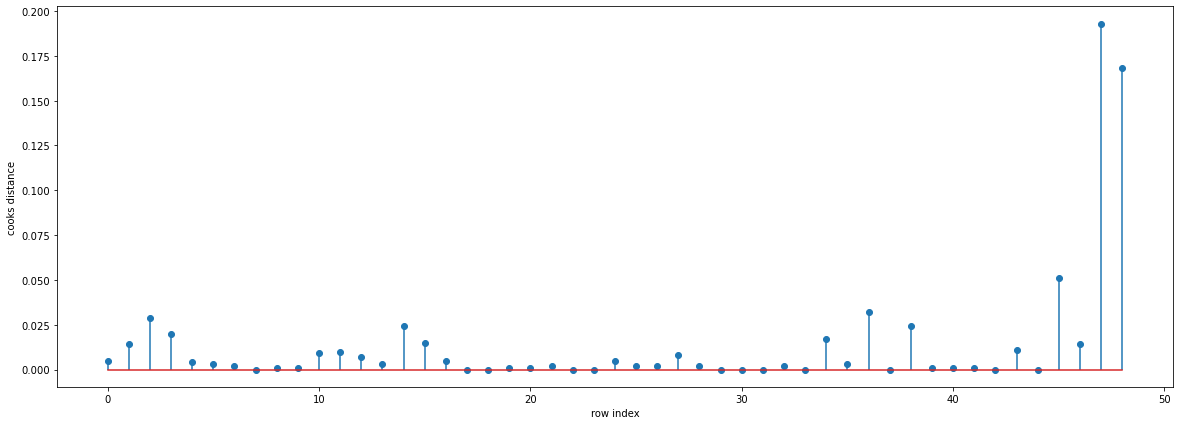

In [45]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_data1)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

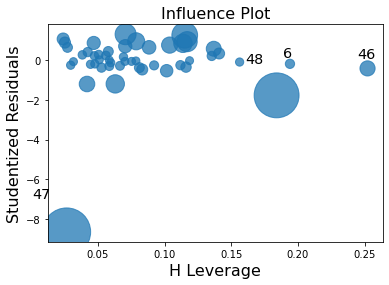

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model1)
plt.show()

In [47]:
model_5 = smf.ols('Profit ~ RDS+MKTS',data = startup_data1).fit()
print('R2 score          : ',round(model_5.rsquared,4))
print('Adjusted R2 score : ',round(model_5.rsquared_adj,4))
print('AIC value         : ',round(model_5.aic,4)) 
print('BIC value         : ',round(model_5.bic,4))

R2 score          :  0.8909
Adjusted R2 score :  0.8861
AIC value         :  1069.3756
BIC value         :  1075.0511


In [48]:
model_6 = smf.ols('Profit ~ RDS+MKTS+ADMS',data = startup_data1).fit()
print('R2 score          : ',round(model_6.rsquared,4))
print('Adjusted R2 score : ',round(model_6.rsquared_adj,4))
print('AIC value         : ',round(model_6.aic,4)) 
print('BIC value         : ',round(model_6.bic,4))

R2 score          :  0.8922
Adjusted R2 score :  0.885
AIC value         :  1070.7803
BIC value         :  1078.3476


#### OBSERVATION
**model_5** is the best model

In [49]:
X_new = startup_data1[['RDS','MKTS']]
X_new

,RDS,MKTS
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62


In [50]:
y = startup_data1[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [51]:
from sklearn.preprocessing import StandardScaler
sandard_scalar = StandardScaler()
scaled_X_new = sandard_scalar.fit_transform(X_new)
scaled_X_new

array([[ 2.04594047,  2.28939539],
       [ 1.98241646,  2.02823787],
       [ 1.77102706,  1.69142329],
       [ 1.56164831,  1.45977264],
       [ 1.50935453,  1.30026986],
       [ 1.27316387,  1.26929816],
       [ 1.33638914, -0.93290769],
       [ 1.23671473,  0.90419383],
       [ 1.01148649,  0.78934315],
       [ 1.07595384,  0.72723538],
       [ 0.58138772,  0.01714991],
       [ 0.55273392,  0.20992208],
       [ 0.39555245,  0.21081076],
       [ 0.35234827,  0.2372724 ],
       [ 0.99765089,  0.27331009],
       [ 0.87252763,  0.32260272],
       [ 0.02960796,  0.34667002],
       [ 0.41386994,  0.51738357],
       [ 0.3467328 ,  0.63300098],
       [ 0.2236913 , -0.15269828],
       [-0.01100793,  0.6680732 ],
       [ 0.038297  ,  0.67812051],
       [-0.0631685 ,  0.71166684],
       [-0.2123577 ,  0.7252416 ],
       [ 0.0072343 , -0.81248839],
       [-0.2785672 , -0.8369524 ],
       [-0.03236322, -0.87359472],
       [-0.10673284,  1.17866472],
       [-0.24654985,

In [52]:
scaled_X_new = pd.DataFrame(data = scaled_X_new, columns=['RDS' , 'MKTS'])
scaled_X_new

,RDS,MKTS
0,2.045940,2.289395
1,1.982416,2.028238
2,1.771027,1.691423
3,1.561648,1.459773
4,1.509355,1.300270
5,1.273164,1.269298
6,1.336389,-0.932908
7,1.236715,0.904194
8,1.011486,0.789343
9,1.075954,0.727235


In [53]:
scaled_X_new.mean()

RDS    -1.857924e-16
MKTS   -1.416101e-16
dtype: float64

In [54]:
scaled_X_new.std()

RDS     1.010363
MKTS    1.010363
dtype: float64

In [55]:
y_pred = model_5.predict(scaled_X_new)
y_pred

0     48953.205113
1     48953.149803
2     48952.976387
3     48952.806659
4     48952.762236
5     48952.575378
6     48952.581208
7     48952.539339
8     48952.359448
9     48952.409040
10    48952.004874
11    48951.986134
12    48951.862212
13    48951.828674
14    48952.338223
15    48952.240547
16    48951.576377
17    48951.882784
18    48951.832157
19    48951.719431
20    48951.550776
21    48951.589854
22    48951.510518
23    48951.393152
24    48951.535563
25    48951.309716
26    48951.503118
27    48951.485503
28    48951.331252
29    48951.321071
30    48951.252338
31    48951.236172
32    48951.269653
33    48951.157122
34    48950.991329
35    48950.982839
36    48950.666166
37    48950.945859
38    48950.509658
39    48950.841403
40    48950.662511
41    48950.645271
42    48950.564783
43    48950.395630
44    48950.515742
45    48950.125270
46    48950.186278
47    48951.488270
48    48950.156081
dtype: float64

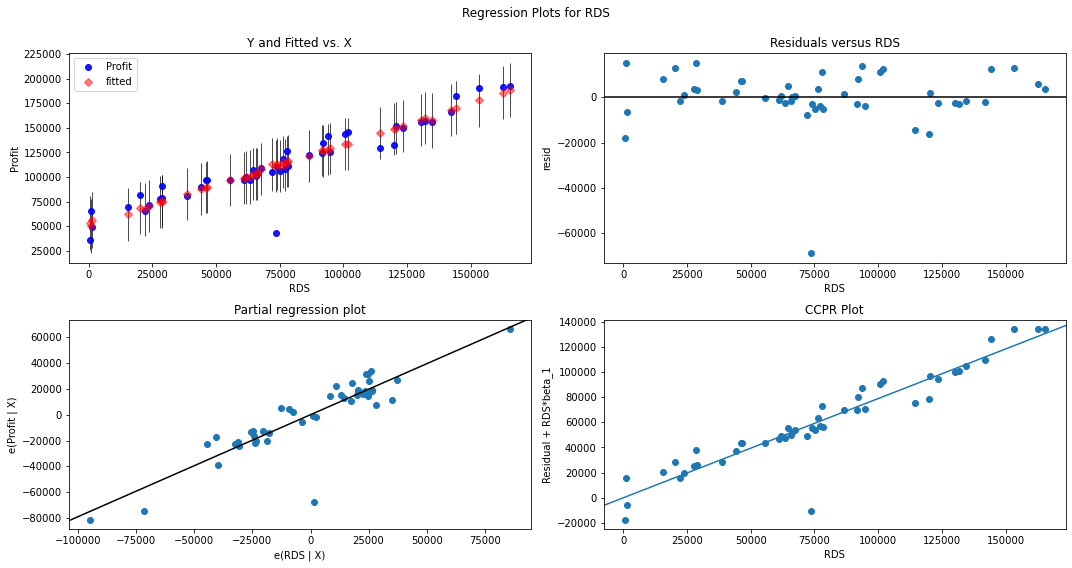

In [58]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_5, "RDS", fig=fig)
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X)

In [65]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(scaled_X_new,y)

LinearRegression()

In [67]:
y_pred = lin_model.predict(scaled_X_new)
y_pred

array([[188762.4900746 ],
       [186035.44978907],
       [178096.74845656],
       [170451.19574474],
       [168324.6974824 ],
       [160191.77395123],
       [157650.44925339],
       [158167.56478754],
       [150230.00636886],
       [152299.24067915],
       [133892.20890255],
       [133325.05332054],
       [127958.60273562],
       [126539.49864096],
       [148655.97143568],
       [144487.75170151],
       [115750.19879794],
       [129238.60880173],
       [127192.40988186],
       [121312.96182971],
       [115049.06084578],
       [116754.45896371],
       [113360.63087579],
       [108294.2260109 ],
       [112511.77634805],
       [102698.34432843],
       [111028.93557644],
       [112869.57075586],
       [103395.75452036],
       [102823.95289307],
       [ 99656.64591059],
       [ 98921.79157247],
       [ 99871.39806012],
       [ 96999.8328884 ],
       [ 89773.00385801],
       [ 89342.54635042],
       [ 75573.90230226],
       [ 87639.94040654],
       [ 686

In [69]:
error  = y - y_pred
error

,Profit
0,3499.339925
1,5756.610211
2,12953.641543
3,12450.794255
4,-2136.757482
5,-3200.653951
6,-1527.939253
7,-2414.964788
8,1981.763631
9,-2539.280679


### Homoscadascity check

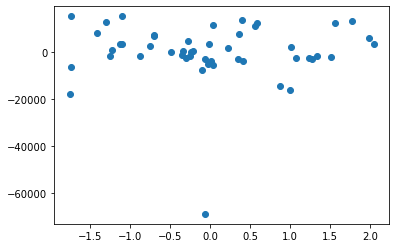

In [73]:
plt.scatter(x = scaled_X_new['RDS'], y =error)
plt.show()

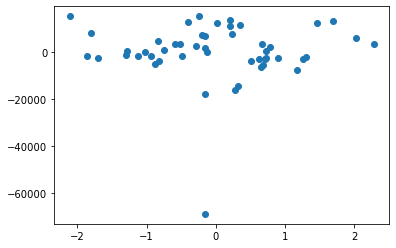

In [74]:
plt.scatter(x = scaled_X_new['MKTS'], y =error)
plt.show()

#### OBSERVATION
Homoscadascity check **failed**

### Zero residual mean

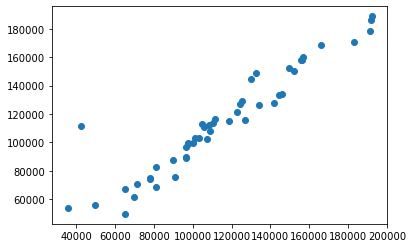

In [75]:
plt.scatter(x = y, y = y_pred)

#### OBSERVATION
zero residual mean is **passed**

In [76]:
startup_data_copy = startup_data1
startup_data_copy

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [77]:
startup_data_copy['log_RDS'] = np.log(startup_data_copy['RDS'])
startup_data_copy['log_ADMS'] = np.log(startup_data_copy['ADMS'])
startup_data_copy['log_MKTS'] = np.log(startup_data_copy['MKTS'])
startup_data_copy

,RDS,ADMS,MKTS,Profit,log_RDS,log_ADMS,log_MKTS
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007


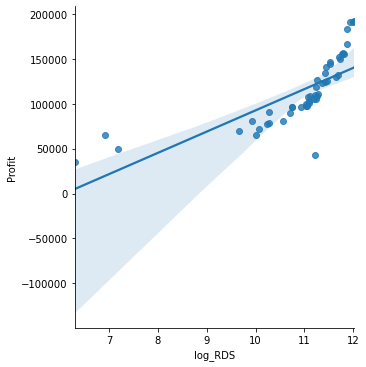

In [78]:
sns.lmplot(x = 'log_RDS', y = 'Profit', data = startup_data_copy)
plt.show()

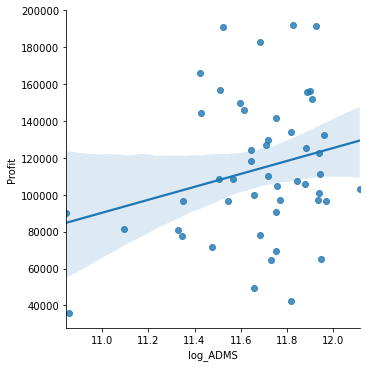

In [81]:
sns.lmplot(x = 'log_ADMS', y = 'Profit', data = startup_data_copy)

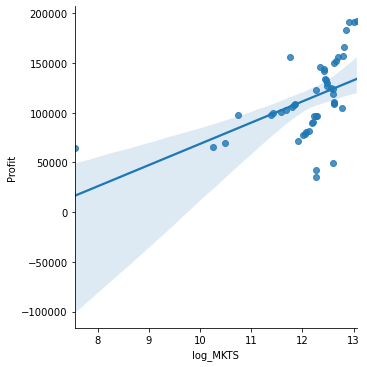

In [83]:
sns.lmplot(x = 'log_MKTS', y = 'Profit', data = startup_data_copy)

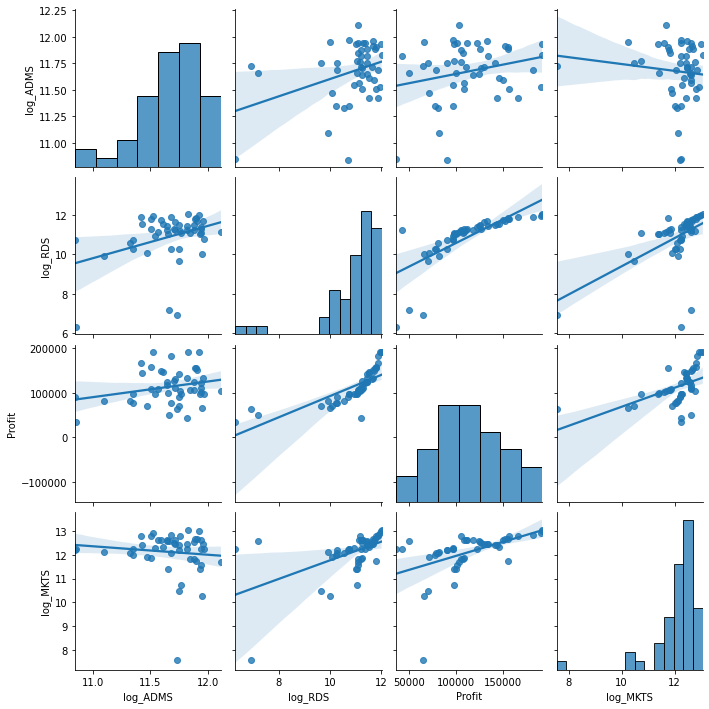

In [87]:
sns.pairplot(startup_data_copy[['log_ADMS','log_RDS','Profit','log_MKTS']],kind = 'reg')
plt.show()

In [89]:
model_8 = smf.ols('Profit ~ log_RDS+log_MKTS',data = startup_data_copy).fit()
print('R2 score          : ',round(model_8.rsquared,4))
print('Adjusted R2 score : ',round(model_8.rsquared_adj,4))
print('AIC value         : ',round(model_8.aic,4)) 
print('BIC value         : ',round(model_8.bic,4))

R2 score          :  0.5766
Adjusted R2 score :  0.5582
AIC value         :  1135.8135
BIC value         :  1141.4889


#### OBSERVATION
Log Transformation is **failed**